## **Problem Statement

**“Which currencies are weakening the fastest this month?”

**Objective:

Use an exchange rate API to:

Pull historical exchange rates for multiple currencies

Calculate percentage change over time

Identify the top 5 weakest currencies vs. USD 

#### ## Module Imports

In [1]:
import pandas as pd  
import requests
import time 
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv() 
api_key = os.getenv("API_KEY")

Code

In [ ]:
live_url = f"https://api.exchangerate.host/historical?access_key={api_key}&date=2025-06-16&currencies=USD,AUD,CAD,EUR,GBP,INR,CNY,JPY,RUB&format=1"
live_response = requests.get(live_url)
live_data = live_response.json()
live_dic = live_data["quotes"]
time.sleep(10)

june_1url = f"https://api.exchangerate.host/historical?access_key={api_key}&date=2025-06-01&currencies=USD,AUD,CAD,EUR,GBP,INR,CNY,JPY,RUB&format=1"
june_5url = f"https://api.exchangerate.host/historical?access_key={api_key}&date=2025-06-05&currencies=USD,AUD,CAD,EUR,GBP,INR,CNY,JPY,RUB&format=1"
june_10url = f"https://api.exchangerate.host/historical?access_key={api_key}&date=2025-06-10&currencies=USD,AUD,CAD,EUR,GBP,INR,CNY,JPY,RUB&format=1"

june_1_response = requests.get(june_1url)
june_1data = june_1_response.json()
june_1dic = june_1data["quotes"]
time.sleep(10)

june_5_response = requests.get(june_5url)
june_5data = june_5_response.json()
june_5dic = june_5data["quotes"]
time.sleep(10)

june_10_response = requests.get(june_10url)
june_10data = june_10_response.json()
june_10dic = june_10data["quotes"]
time.sleep(10)


full_dic = [june_1dic, june_5dic, june_10dic, live_dic]
df = pd.DataFrame(full_dic, index = ["1st June", "5th June", "10th June", "Latest Data"])
df.columns = df.columns.str.replace("USD", "")

ref = df.iloc[0]
latest = df.iloc[3]
perc_change = ((latest-ref)/ref) * 100
df.loc["% change from June 1st"] = perc_change 

series = df.loc["% change from June 1st"]
weak_curr = series.sort_values(ascending = False)
print(weak_curr)

USDEUR   -1.140246
USDAUD   -0.465486
USDCAD   -0.331096
USDCNY   -0.268368
USDRUB   -0.022780
USDGBP    0.265966
USDJPY    1.046714
USDINR    1.250987
Name: % change from June 1st, dtype: float64


Bar chart

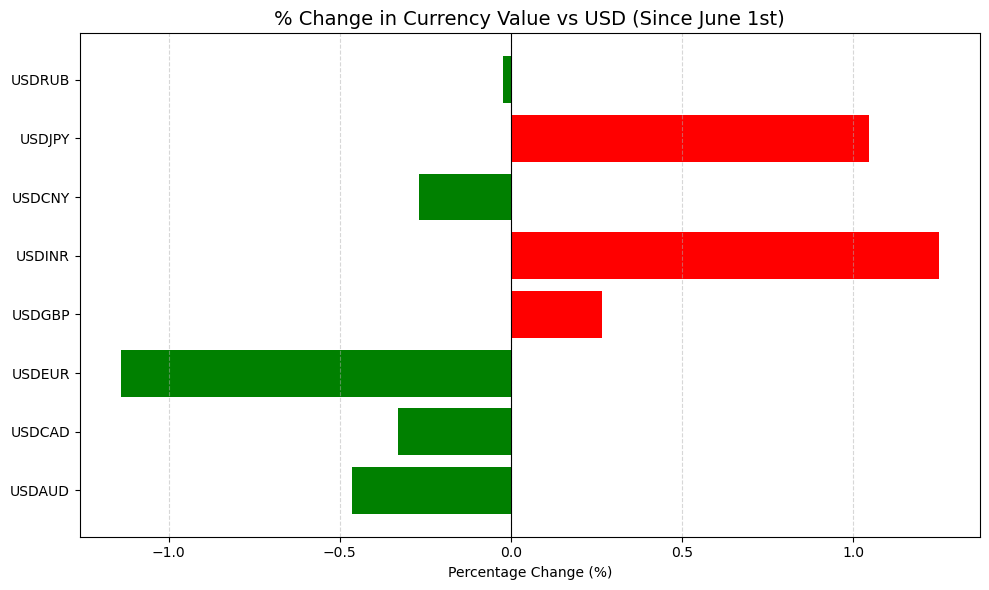

In [9]:
plt.figure(figsize=(10, 6))
bars = plt.barh(perc_change.index, perc_change.values, color=["red" if x > 0 else "green" for x in perc_change.values])
plt.axvline(x=0, color='black', linewidth=0.8)
plt.title("% Change in Currency Value vs USD (Since June 1st)", fontsize=14)
plt.xlabel("Percentage Change (%)")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()